# Imports

In [1]:
import os

import pandas as pd
%load_ext autoreload
%autoreload 2

In [2]:
import pydotplus
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPClassifier

import sys
sys.path.insert(1, '../')
from classification_utilities import *

In [3]:
out_dir = 'results/'
try:
    os.mkdir(out_dir)
except FileExistsError:
    pass

In [4]:
tr, ts, tr_target, ts_target = prepare_data(MinMaxScaler())

In [5]:
print(f'Number of samples in Training set:', len(tr))
print(f'Number of samples in Test set:', len(ts))
tr.shape

Number of samples in Training set: 9206
Number of samples in Test set: 2302


(9206, 38)

# Decision Tree

In [22]:
parameters = {
    'criterion': ['gini', 'entropy','log_loss'],
    'splitter': ['random','best'],
    'max_depth': [4,8,16,None],
    'min_samples_split': [2,4,8,16,32],
    'min_samples_leaf': [1,2,4,8],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [42],
    'max_leaf_nodes': [None],
    'min_impurity_decrease': [0.0, 1e-2],
}

d_tree = DecisionTreeClassifier()

In [ ]:
results_df = grid_search(DecisionTreeClassifier, parameters, 'decision_tree', tr, tr_target)

In [ ]:
grid_search_with_feature_selection(DecisionTreeClassifier, parameters, 'decision_tree', tr, ts, tr_target, ts_target, n_jobs=5,
                                   folds=4, n_features=15)

Best combo:
	params: {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 16, 'random_state': 42, 'splitter': 'best'}
	mean_train_accuracy: 0.8597653775414226
	mean_train_recall: 0.9923019510249732
	mean_train_precision: 0.7948279807242365
	mean_train_f1: 0.8826542625731914
	mean_val_accuracy: 0.8599827314154576
	mean_val_recall: 0.992438301294898
	mean_val_precision: 0.7950281295798927
	mean_val_f1: 0.8828298745235377

Test set metrics: 
Accuracy 0.8514335360556038
Precision test set  0.8796437422880939
Recall test set  0.8514335360556038
F1 score test set  0.8470469786976677
Support test set  (array([0.98678996, 0.78511327]), array([0.69230769, 0.99182339]), array([0.81372549, 0.87644509]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       0.99      0.69      0.81      1079
         bot       0.79      0.99      0.88      1

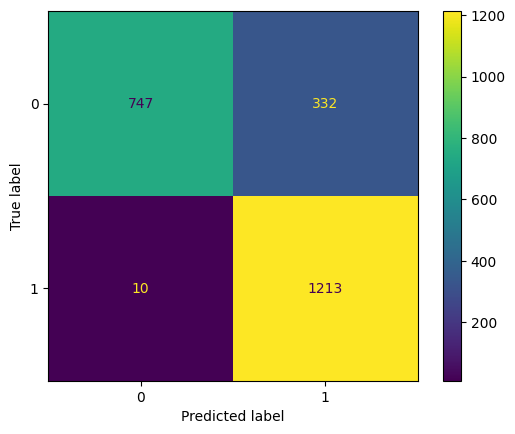

In [41]:
fs  ='SelectKBest'
best_classifer = test_best(DecisionTreeClassifier, tr, ts, tr_target, ts_target, out_dir+'decision_tree/'+fs, results_df=None, in_path=f'results/decision_tree/{fs}/gs_results.csv')

Best combo:
	params: {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 32, 'random_state': 42, 'splitter': 'best'}
	mean_train_accuracy: 0.8597653775414226
	mean_train_recall: 0.9924381908069896
	mean_train_precision: 0.794763405918028
	mean_train_f1: 0.88266850550571
	mean_val_accuracy: 0.8597654345879913
	mean_val_recall: 0.992438301294898
	mean_val_precision: 0.7947692031056501
	mean_val_f1: 0.882669648811985

Test set metrics: 
Accuracy 0.8492615117289314
Precision test set  0.875845234203992
Recall test set  0.8492615117289314
F1 score test set  0.8449784369886438
Support test set  (array([0.97905759, 0.78478544]), array([0.69323448, 0.98691742]), array([0.81172002, 0.8743209 ]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       0.98      0.69      0.81      1079
         bot       0.78      0.99      0.87      1223



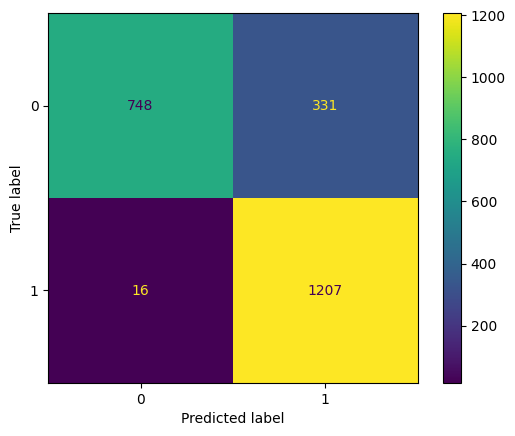

In [42]:
fs = 'SelectFromModel'
best_classifer = test_best(DecisionTreeClassifier, tr, ts, tr_target, ts_target, out_dir+'decision_tree/'+fs, results_df=None, in_path=f'results/decision_tree/{fs}/gs_results.csv')

Best combo:
	params: {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}
	mean_train_accuracy: 0.8597653775414226
	mean_train_recall: 0.9923019510249732
	mean_train_precision: 0.7948277639707649
	mean_train_f1: 0.8826542538978935
	mean_val_accuracy: 0.8598740830017244
	mean_val_recall: 0.992438301294898
	mean_val_precision: 0.7948993859917115
	mean_val_f1: 0.8827499501899962

Test set metrics: 
Accuracy 0.8514335360556038
Precision test set  0.8796437422880939
Recall test set  0.8514335360556038
F1 score test set  0.8470469786976677
Support test set  (array([0.98678996, 0.78511327]), array([0.69230769, 0.99182339]), array([0.81372549, 0.87644509]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       0.99      0.69      0.81      1079
         bot       0.79      0.99      0.88      12

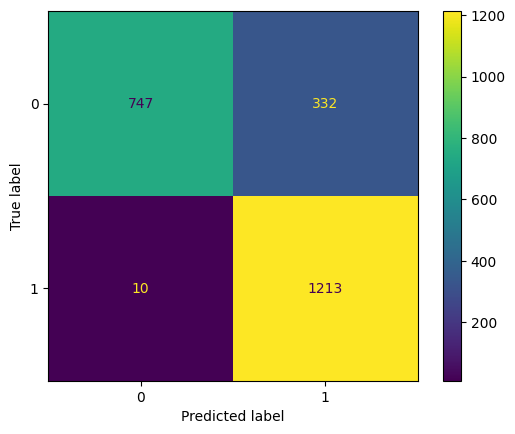

In [43]:
fs = 'RFECV'
best_classifer = test_best(DecisionTreeClassifier, tr, ts, tr_target, ts_target, out_dir+'decision_tree/'+fs, results_df=None, in_path=f'results/decision_tree/{fs}/gs_results.csv')

Best combo:
	params: {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}
	mean_train_accuracy: 0.8600188275663009
	mean_train_recall: 0.9923700709159814
	mean_train_precision: 0.7950995827137397
	mean_train_f1: 0.8828486642803308
	mean_val_accuracy: 0.8600913798291907
	mean_val_recall: 0.992438301294898
	mean_val_precision: 0.795158312465954
	mean_val_f1: 0.8829101759015491

Test set metrics: 
Accuracy 0.8509991311902694
Precision test set  0.8789596023964074
Recall test set  0.8509991311902694
F1 score test set  0.8466236233074147
Support test set  (array([0.98548813, 0.78497409]), array([0.69230769, 0.99100572]), array([0.81328253, 0.87603903]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       0.99      0.69      0.81      1079
         bot       0.78      0.99      0.88      122

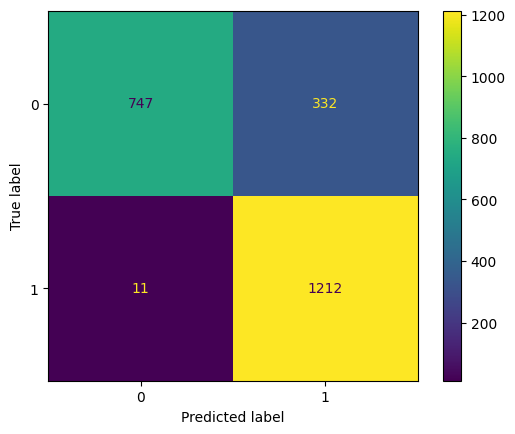

In [44]:
best_classifier = test_best(DecisionTreeClassifier, tr, ts, tr_target, ts_target, out_dir+'decision_tree/', results_df=None, in_path='results/decision_tree/gs_results.csv')

In [ ]:
dot_data = export_graphviz(best_classifier, out_file=None, feature_names=list(ts.columns), filled=True, rounded=True,
                           class_names=['genuine user', 'bot'])
graph = pydotplus.graph_from_dot_data(dot_data)
with open(out_dir+'decision_tree/dtree_graph.png', 'wb') as png:
    png.write(Image(graph.create_png()).data)

# Naive Bayes

In [33]:
labels = ['genuine user','bot']
parameters = {
    'alpha':[0.25,0.5,0.75,1, 2, 10, 1e2, 1e4],
    'fit_prior': [True, False]
}

In [35]:
nb_out_dir = 'mn_naive_bayes'
try:
    os.mkdir(out_dir+nb_out_dir)
except FileExistsError:
    pass

In [ ]:
results_df = grid_search(MultinomialNB, parameters, 'mn_naive_bayes', tr, tr_target)

In [ ]:
grid_search_with_feature_selection(MultinomialNB, parameters, nb_out_dir, tr, ts, tr_target, ts_target)

Best combo:
	params: {'alpha': 0.25, 'fit_prior': False}
	mean_train_accuracy: 0.8105944627593654
	mean_train_recall: 0.9734995985957908
	mean_train_precision: 0.7469203271105075
	mean_train_f1: 0.8452885896905857
	mean_val_accuracy: 0.8116435795867093
	mean_val_recall: 0.9742495083342686
	mean_val_precision: 0.747774062680267
	mean_val_f1: 0.8461171540102062

Test set metrics: 
Accuracy 0.7984361424847958
Precision test set  0.8364979361786584
Recall test set  0.7984361424847958
F1 score test set  0.789669813078634
Support test set  (array([0.95287187, 0.73382625]), array([0.59962929, 0.97383483]), array([0.73606371, 0.83696416]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       0.95      0.60      0.74      1079
         bot       0.73      0.97      0.84      1223

    accuracy                           0.80      2302
   macro avg       0.84      0.79      0.79      2302
weighted avg       0.84      0.80      0.79      2302


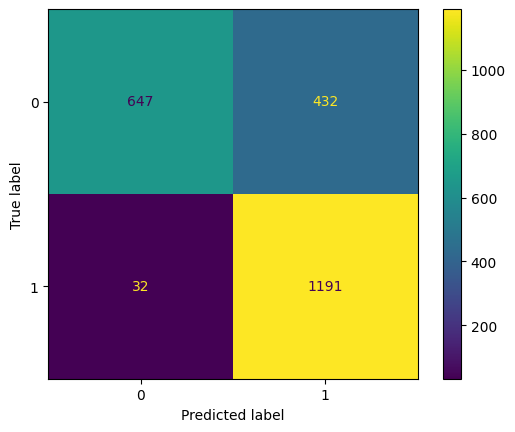

In [45]:
fs = 'SelectKBest'
best_classifer = test_best(MultinomialNB, tr, ts, tr_target, ts_target, out_dir+'mn_naive_bayes/'+fs, results_df=None, in_path=f'results/mn_naive_bayes/{fs}/gs_results.csv')

Best combo:
	params: {'alpha': 0.25, 'fit_prior': False}
	mean_train_accuracy: 0.8093271811700423
	mean_train_recall: 0.987533057363298
	mean_train_precision: 0.7403864208154511
	mean_train_f1: 0.8462840912216216
	mean_val_accuracy: 0.8094713192730392
	mean_val_recall: 0.988146079500211
	mean_val_precision: 0.7403323256864524
	mean_val_f1: 0.8464691527203699

Test set metrics: 
Accuracy 0.7975673327541268
Precision test set  0.845188768998309
Recall test set  0.7975673327541268
F1 score test set  0.7871644431539977
Support test set  (array([0.97815913, 0.72787477]), array([0.58109361, 0.98855274]), array([0.72906977, 0.83841886]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       0.98      0.58      0.73      1079
         bot       0.73      0.99      0.84      1223

    accuracy                           0.80      2302
   macro avg       0.85      0.78      0.78      2302
weighted avg       0.85      0.80      0.79      2302



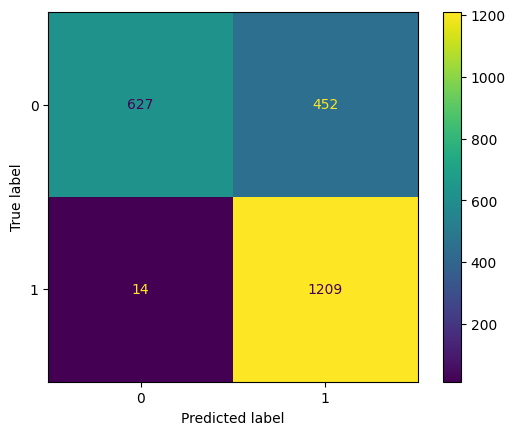

In [46]:
fs= 'SelectFromModel'
best_classifer = test_best(MultinomialNB, tr, ts, tr_target, ts_target, out_dir+'mn_naive_bayes/'+fs, results_df=None, in_path=f'results/mn_naive_bayes/{fs}/gs_results.csv')

Best combo:
	params: {'alpha': 0.25, 'fit_prior': False}
	mean_train_accuracy: 0.8133462808031192
	mean_train_recall: 0.9905988052190716
	mean_train_precision: 0.743483139889147
	mean_train_f1: 0.8494328175281199
	mean_val_accuracy: 0.8129472189593087
	mean_val_recall: 0.9899863188666036
	mean_val_precision: 0.743316067109878
	mean_val_f1: 0.8490902720564439

Test set metrics: 
Accuracy 0.7988705473501303
Precision test set  0.8464878131035474
Recall test set  0.7988705473501303
F1 score test set  0.7885783589279799
Support test set  (array([0.97975078, 0.72891566]), array([0.58294717, 0.9893704 ]), array([0.73097037, 0.8394034 ]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       0.98      0.58      0.73      1079
         bot       0.73      0.99      0.84      1223

    accuracy                           0.80      2302
   macro avg       0.85      0.79      0.79      2302
weighted avg       0.85      0.80      0.79      2302


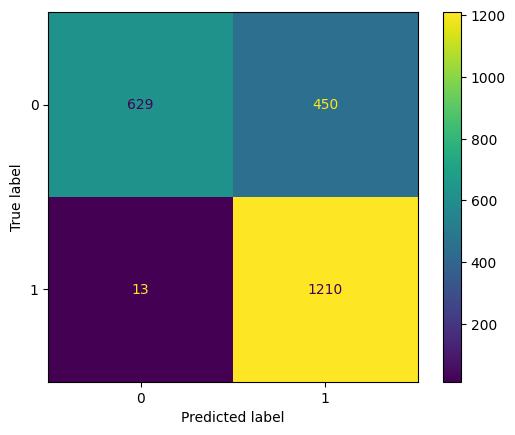

In [47]:
fs = 'RFECV'
best_classifer = test_best(MultinomialNB, tr, ts, tr_target, ts_target, out_dir+'mn_naive_bayes/'+fs, results_df=None, in_path=f'results/mn_naive_bayes/{fs}/gs_results.csv')

In [48]:
best_classifer = test_best(MultinomialNB, tr, ts, tr_target, ts_target, out_dir+'mn_naive_bayes/', results_df=None, in_path=f'results/mn_naive_bayes/gs_results.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'results/mn_naive_bayes/gs_results.csv'

# Random Forest

In [61]:
parameters = {
    "n_estimators": range(50,500,100),
    "criterion": ["gini","entropy","log_loss"],
    "max_depth": [None] + list(range(5,100,10)),
    "min_samples_split": [2,4,8,16,32,64],
    "min_samples_leaf": [2,4,8,16,32,64,128],
    "max_features":["auto","sqrt","log2",None],
    "max_leaf_nodes":[None] + list(range(1,10,2)),
    "min_impurity_decrease": 0.1 * np.array(range(1,5))
}

'  \n"max_depth": [None] + list(range(5,100,10)),\n    #"min_samples_split": [2,4,8,16,32,64],\n    "min_samples_split": [2,16,64],\n    #"min_samples_leaf": [2,4,8,16,32,64,128],\n    "min_samples_leaf": [2,16,64,128],\n    "max_features":["auto","sqrt","log2",None],\n    "max_leaf_nodes":[None] + list(range(1,10,2)),\n    "min_impurity_decrease": 0.1 * np.array(range(1,5))\n'

In [63]:
results_df = grid_search(RandomForestClassifier, parameters, 'random_forest', tr, ts, tr_target, ts_target)

In [ ]:
grid_search_with_feature_selection(RandomForestClassifier, parameters, 'random_forest', tr, ts, tr_target, ts_target)

In [ ]:
#The results files have been merged taking the top 5 most performing configurations for all feature selection approaches and without feature selection
best_classifer = test_best(RandomForestClassifier, tr, ts, tr_target, ts_target, out_dir+'random_forest/', results_df=None, in_path=f'results/random_forest/results_df_random_forest.csv')

# SVM

In [11]:
parameters_linear = {
    'C': [10**(exp) for exp in [-2,-1,1,2,3,4]],
    'kernel': ['linear'],
    'random_state': [42]
}

gamma_range = ['scale','auto'] + [10**(exp) for exp in [-2,-1,0]]

parameters_poly = {
    **parameters_linear,
    'kernel': ['poly'],
    'degree': list(range(2,6)),
    'gamma': gamma_range,
}

parameters_rbf = {
    **parameters_linear,
    'kernel': ['rbf'],
    'gamma': gamma_range
}

In [ ]:
results_df = grid_search(SVC, [parameters_rbf, parameters_linear, parameters_poly], 'svm_all_kernels',tr, tr_target, n_jobs=6)

Fitting 4 folds for each of 216 candidates, totalling 864 fits


Chosen columns of SelectKBest: Index(['statuses_count', 'n_tweets', '2018_tweets', '2019_tweets',
       '2020_tweets', 'publication_date_in_secs_std', 'retweet_count_std',
       'retweet_count_sum', 'reply_count_entropy', 'num_hashtags_mean',
       'num_hashtags_sum', 'num_urls_std', 'num_mentions_mean',
       'num_mentions_std', 'tweeting_regularity'],
      dtype='object')
Fitting 4 folds for each of 156 candidates, totalling 624 fits
Best combo:
	params: {'C': 10000, 'kernel': 'linear', 'random_state': 42}
	mean_train_accuracy: 0.8246795663796785
	mean_train_recall: 1.0
	mean_train_precision: 0.7519650959094468
	mean_train_f1: 0.8584231110151541
	mean_val_accuracy: 0.8246796429309056
	mean_val_recall: 1.0
	mean_val_precision: 0.7520103452151284
	mean_val_f1: 0.8584395562366042

Test set metrics: 
Accuracy 0.8258036490008688
Precision test set  0.8688164179359991
Recall test set  0.8258036490008688
F1 score test set  0.8181930174082958
Support test set  (array([1.        , 0.7530

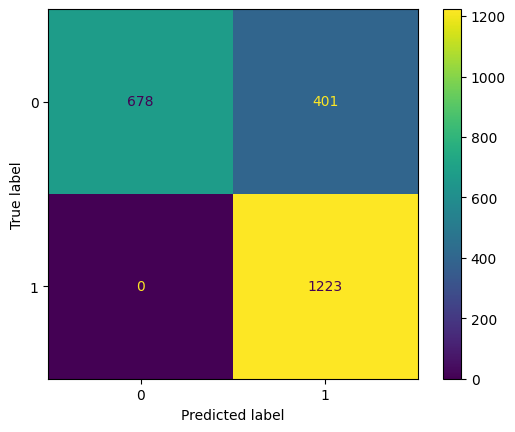

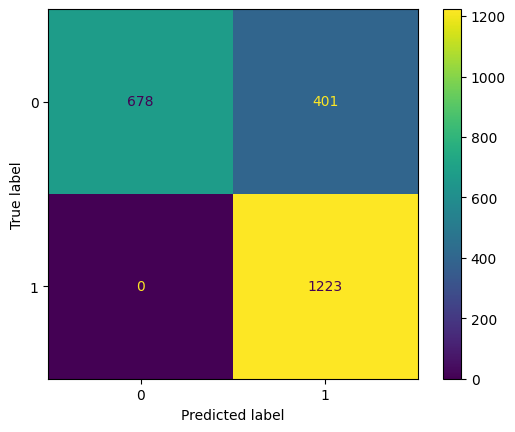

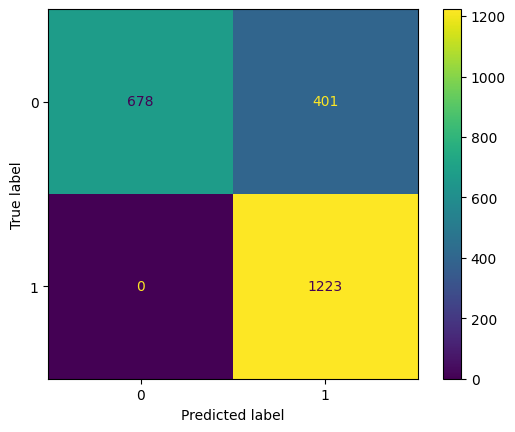

In [26]:
grid_search_with_feature_selection(SVC, [parameters_rbf, parameters_linear, parameters_poly], 'svm_all_kernels', tr, ts, tr_target, ts_target, n_jobs=6,
                                   folds=4, n_features=15)

Best combo:
	params: {'C': 10000, 'kernel': 'linear', 'random_state': 42}
	mean_train_accuracy: 0.8246795663796785
	mean_train_recall: 1.0
	mean_train_precision: 0.7519650959094468
	mean_train_f1: 0.8584231110151541
	mean_val_accuracy: 0.8246796429309056
	mean_val_recall: 1.0
	mean_val_precision: 0.7520103452151284
	mean_val_f1: 0.8584395562366042

Test set metrics: 
Accuracy 0.8149435273675065
Precision test set  0.8627507179930022
Recall test set  0.8149435273675065
F1 score test set  0.8059100198286384
Support test set  (array([1.        , 0.74166161]), array([0.60518999, 1.        ]), array([0.75404157, 0.85167131]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       1.00      0.61      0.75      1079
         bot       0.74      1.00      0.85      1223

    accuracy                           0.81      2302
   macro avg       0.87      0.80      0.80      2302
weighted avg       0.86      0.81      0.81      2302



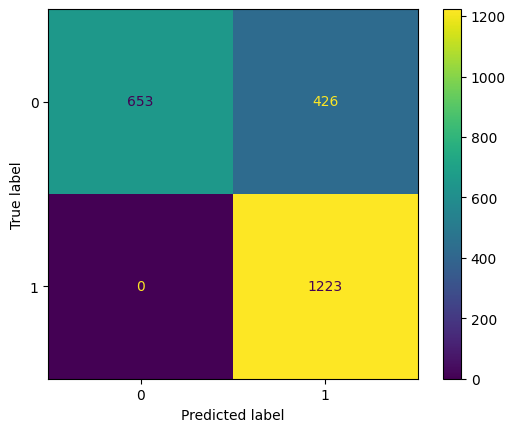

In [37]:
fs = 'SelectKBest'
best_classifer = test_best(SVC, tr, ts, tr_target, ts_target, out_dir+'svm_all_kernels/'+fs, results_df=None, in_path=f'results/svm_all_kernels/{fs}/gs_results.csv')

Best combo:
	params: {'C': 10000, 'kernel': 'linear', 'random_state': 42}
	mean_train_accuracy: 0.8246795663796785
	mean_train_recall: 1.0
	mean_train_precision: 0.7519650959094468
	mean_train_f1: 0.8584231110151541
	mean_val_accuracy: 0.8246796429309056
	mean_val_recall: 1.0
	mean_val_precision: 0.7520103452151284
	mean_val_f1: 0.8584395562366042

Test set metrics: 
Accuracy 0.8149435273675065
Precision test set  0.8627507179930022
Recall test set  0.8149435273675065
F1 score test set  0.8059100198286384
Support test set  (array([1.        , 0.74166161]), array([0.60518999, 1.        ]), array([0.75404157, 0.85167131]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       1.00      0.61      0.75      1079
         bot       0.74      1.00      0.85      1223

    accuracy                           0.81      2302
   macro avg       0.87      0.80      0.80      2302
weighted avg       0.86      0.81      0.81      2302



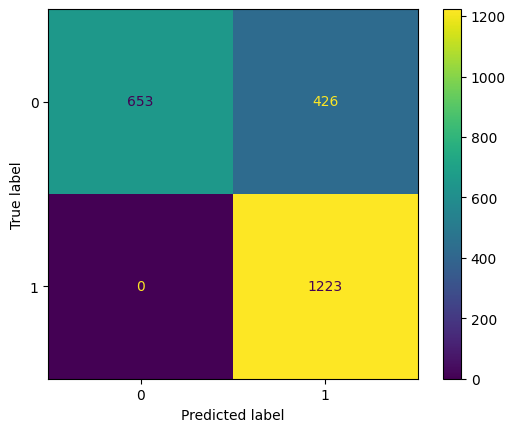

In [38]:
fs = 'SelectFromModel'
best_classifer = test_best(SVC, tr, ts, tr_target, ts_target, out_dir+'svm_all_kernels/'+fs, results_df=None, in_path=f'results/svm_all_kernels/{fs}/gs_results.csv')

Best combo:
	params: {'C': 10000, 'kernel': 'linear', 'random_state': 42}
	mean_train_accuracy: 0.8246795663796785
	mean_train_recall: 1.0
	mean_train_precision: 0.7519650959094468
	mean_train_f1: 0.8584231110151541
	mean_val_accuracy: 0.8246796429309056
	mean_val_recall: 1.0
	mean_val_precision: 0.7520103452151284
	mean_val_f1: 0.8584395562366042

Test set metrics: 
Accuracy 0.8149435273675065
Precision test set  0.8627507179930022
Recall test set  0.8149435273675065
F1 score test set  0.8059100198286384
Support test set  (array([1.        , 0.74166161]), array([0.60518999, 1.        ]), array([0.75404157, 0.85167131]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       1.00      0.61      0.75      1079
         bot       0.74      1.00      0.85      1223

    accuracy                           0.81      2302
   macro avg       0.87      0.80      0.80      2302
weighted avg       0.86      0.81      0.81      2302



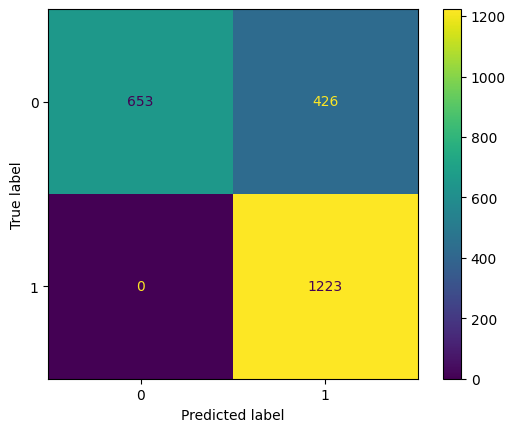

In [39]:
fs = 'RFECV'
best_classifer = test_best(SVC, tr, ts, tr_target, ts_target, out_dir+'svm_all_kernels/'+fs, results_df=None, in_path=f'results/svm_all_kernels/{fs}/gs_results.csv')

Best combo:
	params: {'C': 10000, 'kernel': 'linear', 'random_state': 42}
	mean_train_accuracy: 0.8261640661250224
	mean_train_recall: 0.9999318615426548
	mean_train_precision: 0.7535698112013063
	mean_train_f1: 0.8594437754682707
	mean_val_accuracy: 0.8255482166745769
	mean_val_recall: 0.999387087895938
	mean_val_precision: 0.7531360947561477
	mean_val_f1: 0.8589556663545336

Test set metrics: 
Accuracy 0.8149435273675065
Precision test set  0.8627507179930022
Recall test set  0.8149435273675065
F1 score test set  0.8059100198286384
Support test set  (array([1.        , 0.74166161]), array([0.60518999, 1.        ]), array([0.75404157, 0.85167131]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       1.00      0.61      0.75      1079
         bot       0.74      1.00      0.85      1223

    accuracy                           0.81      2302
   macro avg       0.87      0.80      0.80      2302
weighted avg       0.86      0.81   

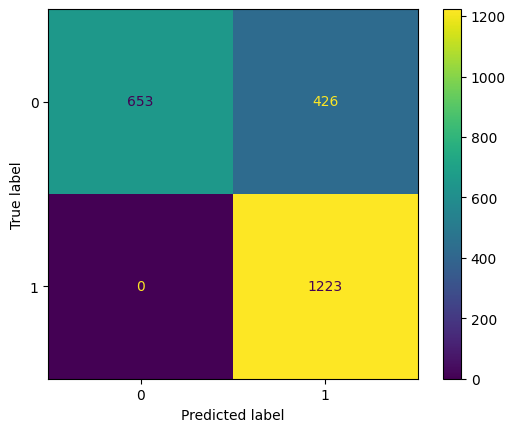

In [49]:
best_classifer = test_best(SVC, tr, ts, tr_target, ts_target, out_dir+'svm_all_kernels/', results_df=None, in_path=f'results/svm_all_kernels/gs_results.csv')

# NN

In [ ]:
parameters = {
    "hidden_layer_sizes": [[5], [10], [64,32,16]],
    "activation": ["logistic", "tanh"],
    "solver": ["sgd", "adam"],
    "alpha": [1e-5, 1e-8],
    "batch_size": [8, 16, 32],
    "learning_rate_init": [1e-2, 1e-3, 5e-3],
    "learning_rate": ['constant', 'adaptive'],
    "momentum": [0.0, 0.2, 0.4, 0.6, 0.8]
}

In [ ]:
results_df = grid_search(MLPClassifier, parameters, 'nn_all', tr, ts, tr_target, ts_target)

In [ ]:
grid_search_with_feature_selection(MLPClassifier, parameters, 'nn_all', tr, ts, tr_target, ts_target, n_jobs=2,
                                       folds=4, n_features=25)

In [ ]:
#The results files have been merged taking the top 5 most performing configurations for all feature selection approaches and without feature selection
best_classifier = test_best(MLPClassifier, tr, ts, tr_target, ts_target, out_dir+'nn_all/', results_df=None, in_path='results/nn_all/results_df.csv')

# Adaboost

In [27]:
parameters = {
    'base_estimator': [SVC(C=10000, kernel='linear', random_state=42), DecisionTreeClassifier(max_depth=4, min_samples_split=2, criterion='gini', min_impurity_decrease=0.0, min_samples_leaf=1, splitter='best', random_state=42), MLPClassifier(activation='logistic', alpha=1e-5, batch_size=32, hidden_layer_sizes=[64,32,16], learning_rate='adaptive', learning_rate_init=5e-3, momentum=0.8, solver='adam')],
    'n_estimators': [4,8,16,32,64,128,256],
    'learning_rate': [1e-3,1e-2, 1e-1, 1, 1e1, 1e2],
    'random_state': [42],
    'algorithm': ['SAMME']
}

In [ ]:
results_df = grid_search(AdaBoostClassifier, parameters, 'adaboost', tr, tr_target)

Chosen columns of SelectKBest: Index(['statuses_count', 'n_tweets', '2018_tweets', '2019_tweets',
       '2020_tweets', 'publication_date_in_secs_std', 'retweet_count_std',
       'retweet_count_sum', 'reply_count_entropy', 'num_hashtags_mean',
       'num_hashtags_sum', 'num_urls_std', 'num_mentions_mean',
       'num_mentions_std', 'tweeting_regularity'],
      dtype='object')
Fitting 4 folds for each of 126 candidates, totalling 504 fits


c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
168 fits failed out of a total of 504.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
168 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 486, in fit
    return super().fit(X, y, sample_weight)
  File "c:\Users\Alessandro\AppData\Local\Programs\

Best combo:
	params: {'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(max_depth=4, random_state=42), 'learning_rate': 0.001, 'n_estimators': 4, 'random_state': 42}
	mean_train_accuracy: 0.8575204595474252
	mean_train_recall: 0.9907351378327738
	mean_train_precision: 0.7928812331117361
	mean_train_f1: 0.8808336400442589
	mean_val_accuracy: 0.8567238453722572
	mean_val_recall: 0.9905993979766887
	mean_val_precision: 0.792006865371252
	mean_val_f1: 0.8802348543644314

Test set metrics: 
Accuracy 0.8614248479582971
Precision test set  0.8876709664642503
Recall test set  0.8614248479582971
F1 score test set  0.8576596514178818
Support test set  (array([0.99222798, 0.79542484]), array([0.70991659, 0.99509403]), array([0.82766072, 0.88412641]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       0.99      0.71      0.83      1079
         bot       0.80      1.00      0.88      1223

    accuracy                           

c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
168 fits failed out of a total of 504.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
168 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 486, in fit
    return super().fit(X, y, sample_weight)
  File "c:\Users\Alessandro\AppData\Local\Programs\

Best combo:
	params: {'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(max_depth=4, random_state=42), 'learning_rate': 0.01, 'n_estimators': 64, 'random_state': 42}
	mean_train_accuracy: 0.8575204595474252
	mean_train_recall: 0.9907351378327738
	mean_train_precision: 0.7928812331117361
	mean_train_f1: 0.8808336400442589
	mean_val_accuracy: 0.8566152913533231
	mean_val_recall: 0.9899861518605808
	mean_val_precision: 0.7921628578435297
	mean_val_f1: 0.880089234309505

Test set metrics: 
Accuracy 0.8614248479582971
Precision test set  0.8876709664642503
Recall test set  0.8614248479582971
F1 score test set  0.8576596514178818
Support test set  (array([0.99222798, 0.79542484]), array([0.70991659, 0.99509403]), array([0.82766072, 0.88412641]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       0.99      0.71      0.83      1079
         bot       0.80      1.00      0.88      1223

    accuracy                           

c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
168 fits failed out of a total of 504.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
168 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 486, in fit
    return super().fit(X, y, sample_weight)
  File "c:\Users\Alessandro\AppData\Local\Programs\

Best combo:
	params: {'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(max_depth=4, random_state=42), 'learning_rate': 0.01, 'n_estimators': 256, 'random_state': 42}
	mean_train_accuracy: 0.8575566651955063
	mean_train_recall: 0.990803257723782
	mean_train_precision: 0.7928925421274545
	mean_train_f1: 0.8808675324800802
	mean_val_accuracy: 0.8567238925696568
	mean_val_recall: 0.9905993979766886
	mean_val_precision: 0.7920084278756813
	mean_val_f1: 0.8802348951647359

Test set metrics: 
Accuracy 0.8614248479582971
Precision test set  0.8876709664642503
Recall test set  0.8614248479582971
F1 score test set  0.8576596514178818
Support test set  (array([0.99222798, 0.79542484]), array([0.70991659, 0.99509403]), array([0.82766072, 0.88412641]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       0.99      0.71      0.83      1079
         bot       0.80      1.00      0.88      1223

    accuracy                          

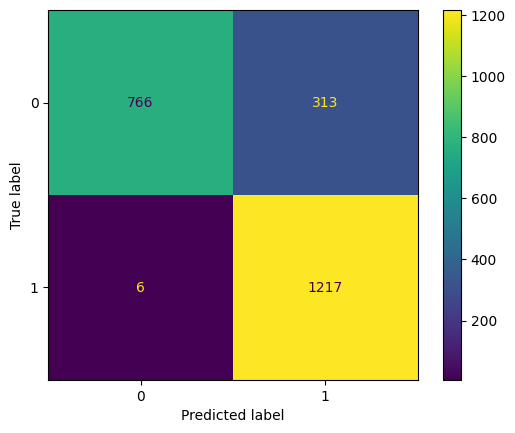

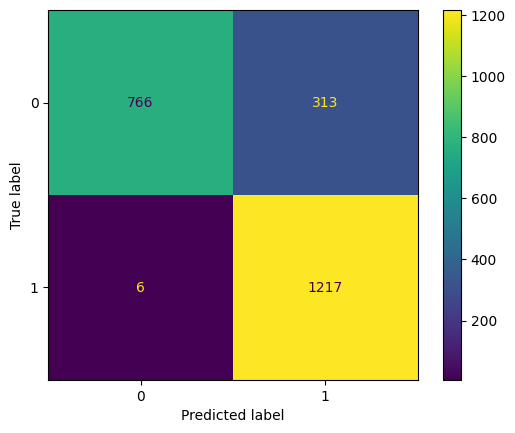

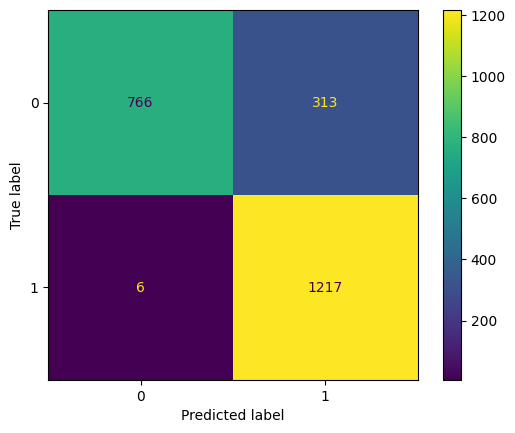

In [28]:
grid_search_with_feature_selection(AdaBoostClassifier, parameters, 'adaboost', tr, ts, tr_target, ts_target, n_jobs=6, folds=4, n_features=15)

Best combo:
	params: {'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(max_depth=4, random_state=42), 'learning_rate': 0.1, 'n_estimators': 128, 'random_state': 42}
	mean_train_accuracy: 0.8600188800078536
	mean_train_recall: 0.9911438386124856
	mean_train_precision: 0.7956814772157466
	mean_train_f1: 0.8827207577110122
	mean_val_accuracy: 0.8590053676658544
	mean_val_recall: 0.990803312330656
	mean_val_precision: 0.7946533938116093
	mean_val_f1: 0.8819401705831882

Test set metrics: 
Accuracy 0.8614248479582971
Precision test set  0.8876709664642503
Recall test set  0.8614248479582971
F1 score test set  0.8576596514178818
Support test set  (array([0.99222798, 0.79542484]), array([0.70991659, 0.99509403]), array([0.82766072, 0.88412641]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       0.99      0.71      0.83      1079
         bot       0.80      1.00      0.88      1223

    accuracy                           

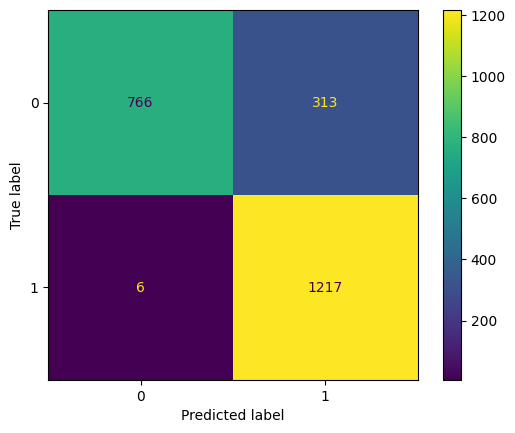

In [31]:
best_classifier = test_best(AdaBoostClassifier, tr, ts, tr_target, ts_target, out_dir+'adaboost/', results_df=None, in_path='results/adaboost/gs_results.csv')

Best combo:
	params: {'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(max_depth=4, random_state=42), 'learning_rate': 0.001, 'n_estimators': 4, 'random_state': 42}
	mean_train_accuracy: 0.8575204595474252
	mean_train_recall: 0.9907351378327738
	mean_train_precision: 0.7928812331117361
	mean_train_f1: 0.8808336400442589
	mean_val_accuracy: 0.8567238453722572
	mean_val_recall: 0.9905993979766888
	mean_val_precision: 0.792006865371252
	mean_val_f1: 0.8802348543644314

Test set metrics: 
Accuracy 0.8514335360556038
Precision test set  0.8796437422880939
Recall test set  0.8514335360556038
F1 score test set  0.8470469786976677
Support test set  (array([0.98678996, 0.78511327]), array([0.69230769, 0.99182339]), array([0.81372549, 0.87644509]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       0.99      0.69      0.81      1079
         bot       0.79      0.99      0.88      1223

    accuracy                           

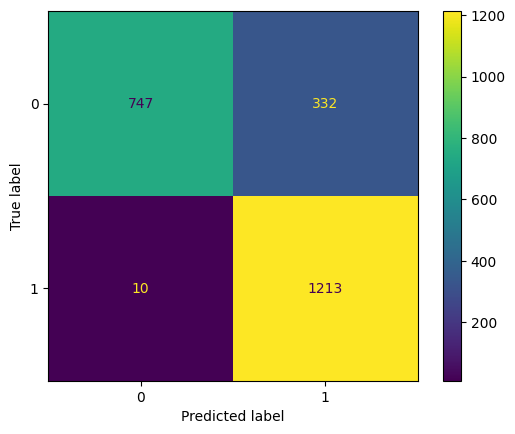

In [7]:
fs = 'SelectKBest'
best_classifer = test_best(AdaBoostClassifier, tr, ts, tr_target, ts_target, out_dir+'adaboost/'+fs, results_df=None, in_path=f'results/adaboost/{fs}/gs_results.csv')

Best combo:
	params: {'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(max_depth=4, random_state=42), 'learning_rate': 0.01, 'n_estimators': 256, 'random_state': 42}
	mean_train_accuracy: 0.8575566651955063
	mean_train_recall: 0.990803257723782
	mean_train_precision: 0.7928925421274545
	mean_train_f1: 0.8808675324800802
	mean_val_accuracy: 0.8567238925696568
	mean_val_recall: 0.9905993979766886
	mean_val_precision: 0.7920084278756813
	mean_val_f1: 0.8802348951647359

Test set metrics: 
Accuracy 0.8514335360556038
Precision test set  0.8796437422880939
Recall test set  0.8514335360556038
F1 score test set  0.8470469786976677
Support test set  (array([0.98678996, 0.78511327]), array([0.69230769, 0.99182339]), array([0.81372549, 0.87644509]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       0.99      0.69      0.81      1079
         bot       0.79      0.99      0.88      1223

    accuracy                          

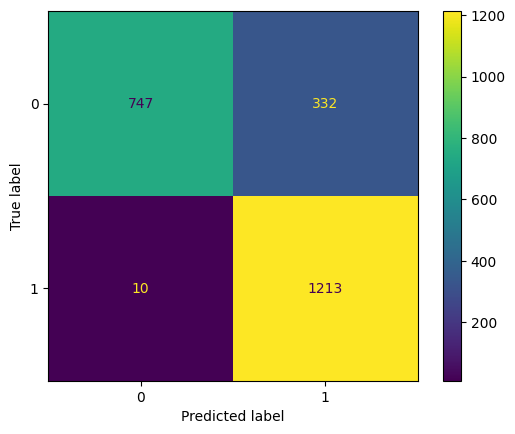

In [8]:
fs = 'SelectFromModel'
best_classifer = test_best(AdaBoostClassifier, tr, ts, tr_target, ts_target, out_dir+'adaboost/'+fs, results_df=None, in_path=f'results/adaboost/{fs}/gs_results.csv')

Best combo:
	params: {'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(max_depth=4, random_state=42), 'learning_rate': 0.01, 'n_estimators': 64, 'random_state': 42}
	mean_train_accuracy: 0.8575204595474252
	mean_train_recall: 0.9907351378327738
	mean_train_precision: 0.7928812331117361
	mean_train_f1: 0.8808336400442589
	mean_val_accuracy: 0.8566152913533231
	mean_val_recall: 0.9899861518605808
	mean_val_precision: 0.7921628578435297
	mean_val_f1: 0.880089234309505

Test set metrics: 
Accuracy 0.8514335360556038
Precision test set  0.8796437422880939
Recall test set  0.8514335360556038
F1 score test set  0.8470469786976677
Support test set  (array([0.98678996, 0.78511327]), array([0.69230769, 0.99182339]), array([0.81372549, 0.87644509]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       0.99      0.69      0.81      1079
         bot       0.79      0.99      0.88      1223

    accuracy                           

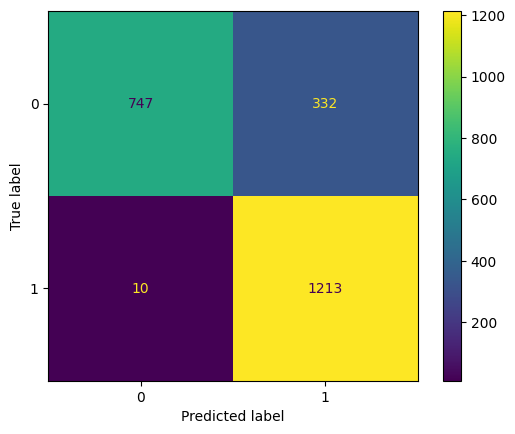

In [10]:
fs = 'RFECV'
best_classifer = test_best(AdaBoostClassifier, tr, ts, tr_target, ts_target, out_dir+'adaboost/'+fs, results_df=None, in_path=f'results/adaboost/{fs}/gs_results.csv')